In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
penguins = pd.read_csv("C:/Users/HP/Downloads/penguins.csv")
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
255,49.1,15.0,228.0,5500.0,1
224,48.2,15.6,221.0,5100.0,1
183,42.8,14.2,209.0,4700.0,1
45,39.6,18.8,190.0,4600.0,0
330,42.5,17.3,187.0,3350.0,2
263,49.8,15.9,229.0,5950.0,1
222,47.7,15.0,216.0,4750.0,1
176,42.9,13.1,215.0,5000.0,1
144,37.3,16.8,192.0,3000.0,0
116,38.6,17.0,188.0,2900.0,0


In [4]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[', row[0], row[1], row[2], row[3], int(row[4]), ']', penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 59.6 17.0 230.0 6050.0 1 ] Gentoo
[ 38.6 21.2 191.0 3800.0 0 ] Adelie
[ 47.5 14.0 212.0 4875.0 1 ] Gentoo
[ 41.5 18.5 201.0 4000.0 0 ] Adelie
[ 49.5 16.1 224.0 5650.0 1 ] Gentoo
[ 46.1 13.2 211.0 4500.0 1 ] Gentoo
[ 49.2 18.2 195.0 4400.0 2 ] Chinstrap
[ 46.3 15.8 215.0 5050.0 1 ] Gentoo
[ 46.8 15.4 215.0 5150.0 1 ] Gentoo
[ 41.3 20.3 194.0 3550.0 0 ] Adelie


C:\Users\HP\AppData\Local\Temp\ipykernel_16928\3945301783.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('[', row[0], row[1], row[2], row[3], int(row[4]), ']', penguin_classes[int(row[4])])


In [5]:
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [7]:
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [8]:
penguins = penguins.dropna()
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

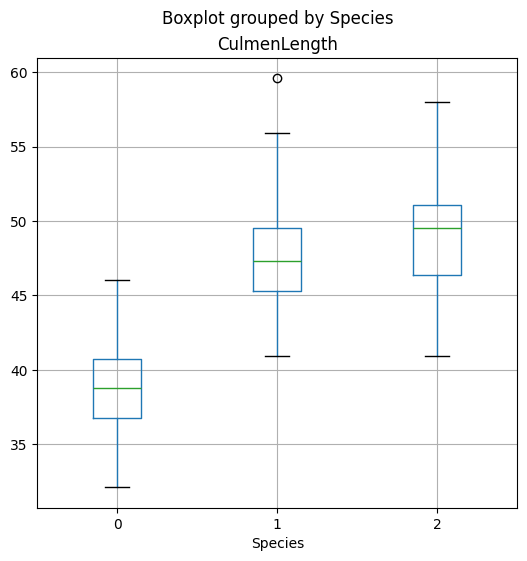

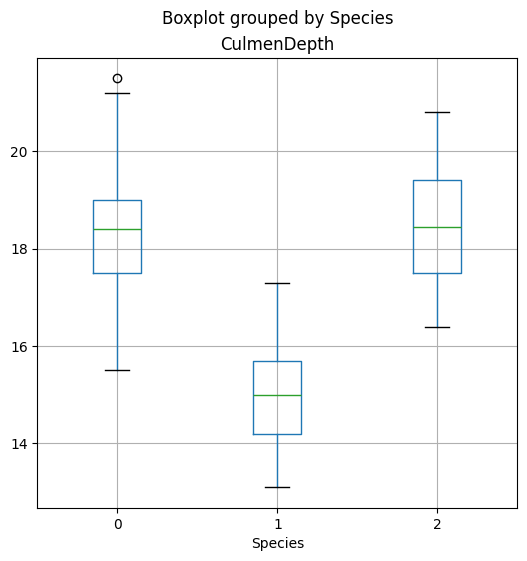

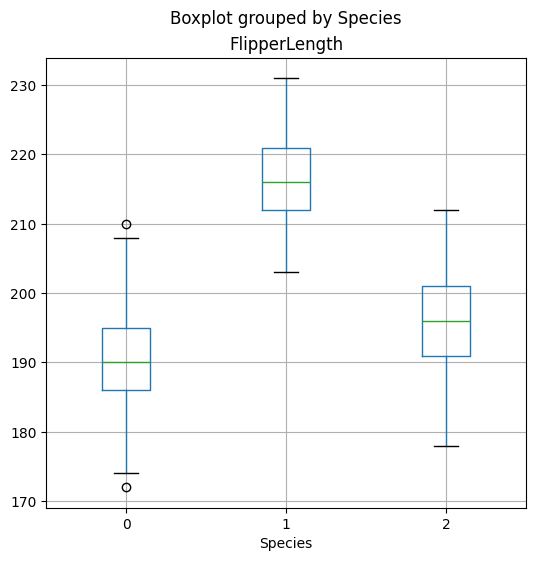

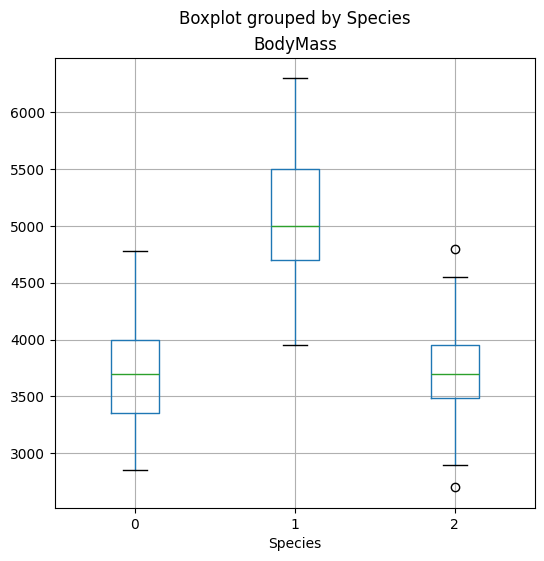

In [10]:
penguin_features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    penguins.boxplot(column=col, by=penguin_label, ax=ax)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
penguins_x, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_x, penguins_y, test_size=0.3, random_state=0, stratify=penguins_y)
print('Training set: %d\nTest set: %d \n'% (x_penguin_train.shape[0], x_penguin_test.shape[0]))

Training set: 239
Test set: 103 



In [12]:
from sklearn.linear_model import LogisticRegression
reg = 0.01
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print(multi_model)

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, max_iter=10000, multi_class='auto')


In [13]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted Labels: ', penguin_predictions)
print('Actual labels: ', y_penguin_test[:15])

Predicted Labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2 1 2 1 0 2 0 2 0 2 0 0 0 1 2 0 0 0 0 2 0 1 0
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 2 0 1 1 1 1 1 2 0 2 0 0 2
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 2 0 0 0 1 2 2 0 0 1 0 1 0 2]
Actual labels:  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Overall accuracy:', accuracy_score(y_penguin_test, penguin_predictions))
print('Overall precision:', precision_score(y_penguin_test, penguin_predictions, average='macro'))
print('Overall recall:', recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall accuracy: 0.970873786407767
Overall precision: 0.9688405797101449
Overall recall: 0.9608465608465608


In [15]:
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


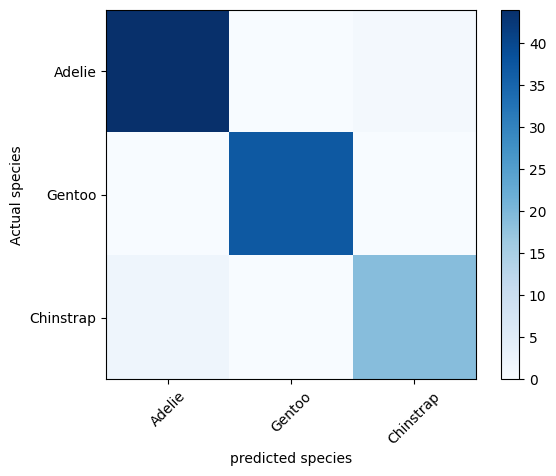

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel('predicted species')
plt.ylabel('Actual species')
plt.show()

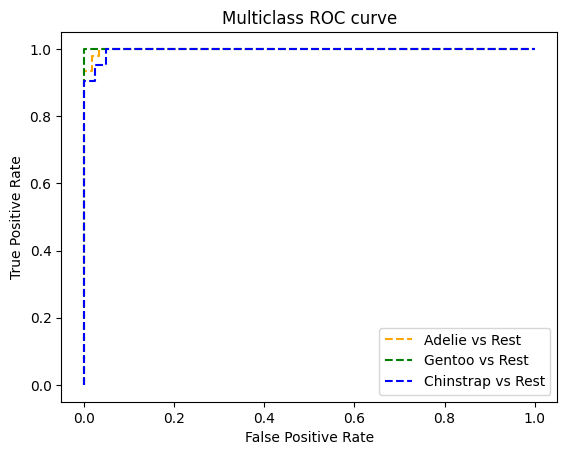

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
penguin_prob = multi_model.predict_proba(x_penguin_test)
# get roc metrics for each class
fpr = {}
tpr = {}
thresh = {}
for i in range (len(penguin_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [22]:
auc = roc_auc_score(y_penguin_test, penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9983277041309


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
feature_columns = [0, 1, 2, 3]
feature_transformer = Pipeline(steps=[('scaler', StandardScaler())])


preprocessor = ColumnTransformer(transformers=[('preprocess', feature_transformer, feature_columns)])
                                               
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('Regressor', SVC(probability=True))])
multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('Regressor', SVC(probability=True))])


Overall accuracy: 0.9805825242718447
Overall precision: 0.9767195767195768
Overall recall: 0.9767195767195768
Average AUC: 0.9990361381446328


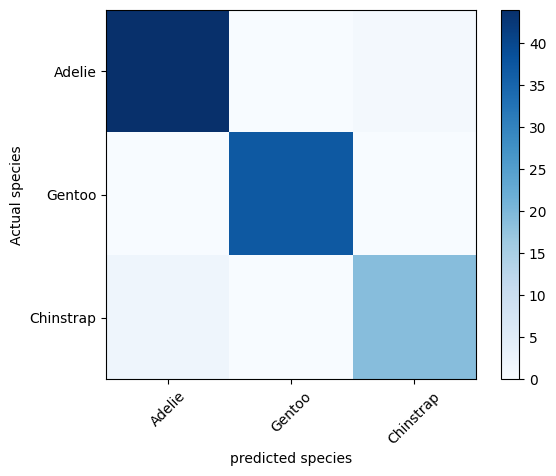

In [25]:
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)
print('Overall accuracy:', accuracy_score(y_penguin_test, penguin_predictions))
print('Overall precision:', precision_score(y_penguin_test, penguin_predictions, average='macro'))
print('Overall recall:', recall_score(y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguin_test, penguin_prob, multi_class='ovr'))
plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel('predicted species')
plt.ylabel('Actual species')
plt.show()

In [26]:
import joblib
filename = "C:/Users/HP/Downloads/penguins.pkl"
joblib.dump(multi_model, filename)

['C:/Users/HP/Downloads/penguins.pkl']

In [29]:
multi_model = joblib.load(filename)
x_new = np.array([[50.4, 15.3, 224, 5550]])
print('New sample: {}'.format(x_new[0]))
penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])

New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


In [30]:
x_new = np.array([[49.5, 18.4, 195, 3600],
                  [38.2, 20.1, 190, 3900]])
print('New samples:\n{}'.format(x_new))
predictions = multi_model.predict(x_new)
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] + ')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)
